In [1]:
import json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("white")
sns.set_context("paper", font_scale=0.9, rc={"lines.linewidth": 1.0})

#SET COLOR SCHEME OF EACH TEAM
OWLpal = ['#FF8802', '#333333', '#ADADAD', '#F7F7F7']
NYXpal = ['#1157EB', '#171D38']
SPTpal = ['#57CBE9', '#1C2B39']
VALpal = ['#E5D67B', '#7DBB8C']
GLApal = ['#381361', '#252125']
SHOpal = ['#FC4D01', '#4D4457']
DALpal = ['#0072CE', '#BFC4CA']
DYNpal = ['#AC8903', '#000000']
UPRpal = ['#1D4C97', '#FDFA8E']
FUSpal = ['#F99C2A', '#000000']
MAYpal = ['#AE262E', '#FAEE7D']
HOUpal = ['#96CA4F', '#000000']
DRApal = ['#C42126', '#000000']

# DATA IMPORTING AND CLEANING

Each json file being imported below was a result of scraping from http://winstonslab.com.

## Player Details

Masterlist of all players in OWL, including team, role played, country of origin and whether they are main players or substitutes.

In [2]:
with open('players.json') as json_data:
    players = json.load(json_data)

In [3]:
df_players = pd.DataFrame({'playername':{'country':0, 'main':0, 'role':0, 'team':0}}).transpose()

for team in players:
    df_players = pd.concat([df_players, pd.DataFrame(team['player_details']).transpose()])

df_players = df_players.drop('playername', axis = 0)
df_players = df_players[['team', 'role', 'main', 'country']]

df_players.head()

,team,role,main,country
Bani,Houston Outlaws,Support,1,Canada
Boink,Houston Outlaws,Support,1,USA
JAKE,Houston Outlaws,Offense,1,USA
LiNkzr,Houston Outlaws,Offense,1,Finland
Mendokusaii,Houston Outlaws,Offense,0,Sweden


## Match Statistics

Match details of all 62 fights in the first stage of Overwatch League.

In [4]:
def parse_match(mat):
    
    num_map = len(mat['map_details']['map_name'])
    
    date = pd.to_datetime(mat['date'],infer_datetime_format=True)
    
    if num_map == 4:
        mat['map_details']['map_name'].append('NA')
        mat['map_details']['score1'].append('NA')
        mat['map_details']['score2'].append('NA')
        mat['map_details']['details_1'].append('NA')
        mat['map_details']['details_2'].append('NA')
        
    df_matchStats = pd.DataFrame({mat['matchID']: {'Date': date,
                                                  'Team1': mat['team1'],
                                                  'Team2': mat['team2'],
                                                  'Team1_Score': mat['team1_score'],
                                                  'Team2_Score': mat['team2_score'],
                                                  'Fights_1': mat['fights_1'],
                                                  'Fights_2':mat['fights_2'],
                                                  'Kills_1':mat['kills_1'],
                                                  'Kills_2':mat['kills_2'],
                                                   
                                                  'Map1':mat['map_details']['map_name'][0],
                                                  'Score_1_1': mat['map_details']['score1'][0],
                                                  'Score_1_2': mat['map_details']['score2'][0],
                                                  'MatchDet_1_1': mat['map_details']['details_1'][0],
                                                  'MatchDet_1_2': mat['map_details']['details_2'][0],
                                                   
                                                  'Map2':mat['map_details']['map_name'][1],
                                                  'Score_2_1': mat['map_details']['score1'][1],
                                                  'Score_2_2': mat['map_details']['score2'][1],
                                                  'MatchDet_2_1': mat['map_details']['details_1'][1],
                                                  'MatchDet_2_2': mat['map_details']['details_2'][1],
                                                   
                                                  'Map3':mat['map_details']['map_name'][2],
                                                  'Score_3_1': mat['map_details']['score1'][2],
                                                  'Score_3_2': mat['map_details']['score2'][2],
                                                  'MatchDet_3_1': mat['map_details']['details_1'][2],
                                                  'MatchDet_3_2': mat['map_details']['details_2'][2],
                                                   
                                                  'Map4':mat['map_details']['map_name'][3],
                                                  'Score_4_1': mat['map_details']['score1'][3],
                                                  'Score_4_2': mat['map_details']['score2'][3],
                                                  'MatchDet_4_1': mat['map_details']['details_1'][3],
                                                  'MatchDet_4_2': mat['map_details']['details_2'][3],
                                                   
                                                  'Map5':mat['map_details']['map_name'][4],
                                                  'Score_5_1': mat['map_details']['score1'][4],
                                                  'Score_5_2': mat['map_details']['score2'][4],
                                                  'MatchDet_5_1': mat['map_details']['details_1'][4],
                                                  'MatchDet_5_2': mat['map_details']['details_2'][4],
                                                   
                                                  }})
    
    return (df_matchStats.transpose())

In [5]:
with open('owl.json') as json_data:
    match_stats = json.load(json_data)

init_match = match_stats[0].copy()
init_match['matchID']= 'trial'
df_matchStats = parse_match(init_match)

for match in match_stats:
    
    df_matchStats = pd.concat([df_matchStats, parse_match(match)])
    
df_matchStats = df_matchStats.drop('trial', axis = 0)
df_matchStats = df_matchStats[['Date', 'Team1', 'Team2', 'Team1_Score', 'Team2_Score', 
                             'Fights_1', 'Fights_2', 'Kills_1', 'Kills_2',
                             'Map1', 'Score_1_1', 'Score_1_2', 'MatchDet_1_1', 'MatchDet_1_2',
                             'Map2', 'Score_2_1', 'Score_2_2', 'MatchDet_2_1', 'MatchDet_2_2',
                             'Map3', 'Score_3_1', 'Score_3_2', 'MatchDet_3_1', 'MatchDet_3_2', 
                             'Map4', 'Score_4_1', 'Score_4_2', 'MatchDet_4_1', 'MatchDet_4_2', 
                             'Map5', 'Score_5_1', 'Score_5_2', 'MatchDet_5_1', 'MatchDet_5_2'
                             ]]

df_matchStats['Team1_Score'] = pd.to_numeric(df_matchStats['Team1_Score'])
df_matchStats['Team2_Score'] = pd.to_numeric(df_matchStats['Team2_Score'])
df_matchStats['Fights_1'] = pd.to_numeric(df_matchStats['Fights_1'])
df_matchStats['Fights_2'] = pd.to_numeric(df_matchStats['Fights_2'])
df_matchStats['Kills_1'] = pd.to_numeric(df_matchStats['Kills_1'])
df_matchStats['Kills_2'] = pd.to_numeric(df_matchStats['Kills_2'])
df_matchStats['Score_1_1'] = pd.to_numeric(df_matchStats['Score_1_1'])
df_matchStats['Score_1_2'] = pd.to_numeric(df_matchStats['Score_1_2'])
df_matchStats['Score_2_1'] = pd.to_numeric(df_matchStats['Score_2_1'])
df_matchStats['Score_2_2'] = pd.to_numeric(df_matchStats['Score_2_2'])
df_matchStats['Score_3_1'] = pd.to_numeric(df_matchStats['Score_3_1'])
df_matchStats['Score_3_2'] = pd.to_numeric(df_matchStats['Score_3_2'])
df_matchStats['Score_4_1'] = pd.to_numeric(df_matchStats['Score_4_1'])
df_matchStats['Score_4_2'] = pd.to_numeric(df_matchStats['Score_4_2'])
df_matchStats['Score_5_1'] = pd.to_numeric(df_matchStats['Score_5_1'], errors= 'coerce')
df_matchStats['Score_5_2'] = pd.to_numeric(df_matchStats['Score_5_2'], errors= 'coerce')

def conv_det(x):
    if x == 'NA':
        return x
    else:
        return float(x[:-1])
    
df_matchStats['MatchDet_1_1'] = df_matchStats['MatchDet_1_1'].apply(conv_det)
df_matchStats['MatchDet_1_2'] = df_matchStats['MatchDet_1_2'].apply(conv_det)
df_matchStats['MatchDet_2_1'] = df_matchStats['MatchDet_2_1'].apply(conv_det)
df_matchStats['MatchDet_2_2'] = df_matchStats['MatchDet_2_2'].apply(conv_det)
df_matchStats['MatchDet_3_1'] = df_matchStats['MatchDet_3_1'].apply(conv_det)
df_matchStats['MatchDet_3_2'] = df_matchStats['MatchDet_3_2'].apply(conv_det)
df_matchStats['MatchDet_4_1'] = df_matchStats['MatchDet_4_1'].apply(conv_det)
df_matchStats['MatchDet_4_2'] = df_matchStats['MatchDet_4_2'].apply(conv_det)
df_matchStats['MatchDet_5_1'] = df_matchStats['MatchDet_5_1'].apply(conv_det)
df_matchStats['MatchDet_5_2'] = df_matchStats['MatchDet_5_2'].apply(conv_det)


for m in range(df_matchStats.shape[0]):
    
    mdata = df_matchStats.iloc[m,:]
    
    for i in [9, 14, 19, 24, 29]:

        if mdata[i+1] == mdata[i+2] and mdata[i+3] != mdata[i+4]:
            if mdata[i+3] > mdata[i+4]:

                df_matchStats.iat[m,i+1] += 1
            else:

                df_matchStats.iat[m,i+2] += 1
    

df_matchStats.head()

,Date,Team1,Team2,Team1_Score,Team2_Score,Fights_1,Fights_2,Kills_1,Kills_2,Map1,...,Map4,Score_4_1,Score_4_2,MatchDet_4_1,MatchDet_4_2,Map5,Score_5_1,Score_5_2,MatchDet_5_1,MatchDet_5_2
2381,2018-01-11 00:00:00,London Spitfire,Florida Mayhem,3,1,30,17,189,131,Dorado,...,Numbani,3,0,0.00,86.30,NA,NaN,NaN,NA,NA
2379,2018-01-11 00:00:00,Shanghai Dragons,Los Angeles Gladiators,0,4,8,30,72,175,Dorado,...,Eichen,0,1,87.20,87.21,NA,NaN,NaN,NA,NA
2402,2018-01-13 00:00:00,London Spitfire,Philadelphia Fusion,4,0,48,12,201,113,Junk,...,Numbani,3,0,0.00,0.00,NA,NaN,NaN,NA,NA
2375,2018-01-11 00:00:00,San Francisco Shock,Los Angeles Valiant,0,4,24,37,177,231,Dorado,...,Numbani,1,2,75.55,75.56,NA,NaN,NaN,NA,NA
2401,2018-01-13 00:00:00,San Francisco Shock,Shanghai Dragons,3,1,31,23,178,135,Junk,...,Numbani,3,2,0.00,82.47,NA,NaN,NaN,NA,NA


## Player Performance Per Map

Details of each player's performance in every map played.

In [6]:
def parse_player_perf(mat):
    
    map_stats = mat['stats']
    maps = mat['map_details']['map_name']
    matchID = mat['matchID']
    
    df_map1 = pd.concat([pd.DataFrame(map_stats['map1_team1']).transpose(), pd.DataFrame(map_stats['map1_team2']).transpose()])
    df_map1['Map'] = maps[0]
    
    df_map2 = pd.concat([pd.DataFrame(map_stats['map2_team1']).transpose(), pd.DataFrame(map_stats['map2_team2']).transpose()])
    df_map2['Map'] = maps[1]
    
    df_map3 = pd.concat([pd.DataFrame(map_stats['map3_team1']).transpose(), pd.DataFrame(map_stats['map3_team2']).transpose()])
    df_map3['Map'] = maps[2]
    
    df_map4 = pd.concat([pd.DataFrame(map_stats['map4_team1']).transpose(), pd.DataFrame(map_stats['map4_team2']).transpose()])
    df_map4['Map'] = maps[3]
    

    try:
        
        df_map5 = pd.concat([pd.DataFrame(map_stats['map5_team1']).transpose(), pd.DataFrame(map_stats['map5_team2']).transpose()])
        df_map5['Map'] = maps[4]
        df_map = pd.concat([df_map1, df_map2, df_map3, df_map4, df_map5])
        
    except:
        
        df_map = pd.concat([df_map1, df_map2, df_map3, df_map4])
        
    df_map['matchID'] = matchID
    
    return df_map

In [7]:
df_mapPerf = pd.DataFrame({'trial':{ 
                                    'deaths':0, 
                                    'fk_diff':0,
                                   'kd_diff':0,
                                   'kills':0,
                                   'name':0,
                                   'ults':0,
                                   'Map':0,
                                   'matchID':0}}).transpose()

for match in match_stats:
    
    df_mapPerf = pd.concat([df_mapPerf, parse_player_perf(match)])

df_mapPerf = df_mapPerf.drop('trial', axis = 0)
df_mapPerf = df_mapPerf.reset_index().drop('index', axis = 1)
df_mapPerf = df_mapPerf[['name', 'Map', 'matchID', 'kills', 'deaths', 'kd_diff', 'fk_diff', 'ults']]
df_mapPerf['kills'] = pd.to_numeric(df_mapPerf['kills'])
df_mapPerf['deaths'] = pd.to_numeric(df_mapPerf['deaths'])
df_mapPerf['kd_diff'] = pd.to_numeric(df_mapPerf['kd_diff'])
df_mapPerf['fk_diff'] = pd.to_numeric(df_mapPerf['fk_diff'])
df_mapPerf['ults'] = pd.to_numeric(df_mapPerf['ults'])

df_mapPerf.head()

,name,Map,matchID,kills,deaths,kd_diff,fk_diff,ults
0,Birdring,Dorado,2381,6,3,3,0,6
1,Nus,Dorado,2381,0,6,-6,-2,3
2,Fury,Dorado,2381,6,7,-1,0,0
3,Gesture,Dorado,2381,4,6,-2,-2,2
4,Profit,Dorado,2381,12,5,7,3,4


## Player Performance per Character

Contains details of a player per character used in a match.

In [8]:
with open('detstats.json') as json_data:
    det_stats = json.load(json_data)

In [9]:
detStat = []
for x in det_stats:
    if x['det_stats'] != {}:
        detStat.append(x)

In [10]:
def parse_detStats(item):
    
    detStat = item['det_stats']
    matchID = item['matchID']
    
    df_detStat = pd.DataFrame(detStat).transpose()
    df_detStat['matchID'] = matchID
    
    return df_detStat

In [11]:
df_detStats = pd.DataFrame({'trial':{'name':0,
                                     'matchID':0,
                                     'character':0,
                                     'time_played':0,
                                     'kills/10':0,
                                     'deaths/10':0,
                                     'ults/10':0,
                                     'kills%':0,
                                     'first_kill':0,
                                     'first_death':0,
                                     'fw_perc':0,
                                     'ultchargetime':0,
                                     'ult_eff':0,
                                     'ult_out':0,
                                     'kills/ult':0
                                    }}).transpose()

for match in detStat:
    df_detStats = pd.concat([df_detStats, parse_detStats(match)])

df_detStats = df_detStats.drop('trial', axis = 0).reset_index()
df_detStats = df_detStats.drop('index', axis = 1)

df_detStats = df_detStats[['name', 'character', 'matchID', 'time_played','kills/10','deaths/10','ults/10','kills%','first_kill','first_death','fw_perc','ultchargetime','ult_eff','ult_out','kills/ult'
]]

def convert_minutes(time):
    time = time.split(':')
    time = int(time[0])*60 + int(time[1]) + int(time[2])/60
    return time
    
df_detStats['time_played'] = df_detStats['time_played'].apply(convert_minutes)

for i in range(4,15):
    if i in [4, 5, 6, 11, 12, 14]:
        df_detStats.iloc[:,i] = pd.to_numeric(df_detStats.iloc[:,i])
    else:
        df_detStats.iloc[:,i] = df_detStats.iloc[:,i].apply(lambda x: float(x[:-1])/100)

df_detStats['kills'] = round((df_detStats['time_played']/10)*df_detStats['kills/10'])
df_detStats['deaths'] = round((df_detStats['time_played']/10)*df_detStats['deaths/10'])
df_detStats.head()

,name,character,matchID,time_played,kills/10,deaths/10,ults/10,kills%,first_kill,first_death,fw_perc,ultchargetime,ult_eff,ult_out,kills/ult,kills,deaths
0,uNKOE,Zenyatta,2375,54.433333,3.67,6.61,3.86,0.0866,0.06,0.06,0.5692,96,9.74,0.1429,0,20.0,36.0
1,dhaK,Lucio,2375,5.266667,1.90,7.59,3.80,0.0500,0.17,0.17,0.5000,123,50.00,0.0000,0,1.0,4.0
2,dhaK,Mercy,2375,49.166667,0.00,5.29,4.88,0.0000,0.00,0.02,0.3559,90,-0.59,0.0000,0,0.0,26.0
3,babybay,Genji,2375,18.666667,8.04,9.11,5.36,0.2206,0.00,0.10,0.3000,74,3.33,0.0000,0,15.0,17.0
4,babybay,Junkrat,2375,0.450000,0.00,22.22,0.00,0.0000,0.00,0.00,0.0000,0,0.00,0.0000,0,0.0,1.0


## Play-by-Play Data

Play log of every significant action in a match including KILLS, SWITCHES, REVIVES, ULTS, etc.

In [12]:
with open('playbyplay.json') as json_data:
    pbp = json.load(json_data)
    
pbp[503]['match_details']['events'][84][5] = 4

In [13]:
def parse_events(evt):

    mat_det = evt['match_details']
    red_team = mat_det['red']
    red_players = mat_det['rednames']
    blue_team = mat_det['blue']
    blue_players = mat_det['bluenames']
    
    blue_player_dict = {}
    red_player_dict = {}
    
    teams = {'BLUE': blue_team, 'RED': red_team}
    b = 1
    for blu in blue_players:
        blue_player_dict[b] = blu
        b+=1
    
    r = 1
    for red in red_players:
        red_player_dict[r] = red
        r+=1
        
    events = mat_det['events']
    
    df_events = pd.DataFrame({'time':{'Action':0,
                                      'ActingTeam':0,
                                      'ActingPlayer':0,
                                      'SWITCH_from':0,
                                      'SWITCH_to':0,
                                      'KILL_er_char':0,
                                      'KILL_ed_char':0,
                                      'KILL_ed_name':0,
                                      'ULT_USE_char':0,
                                      'ULT_GAIN_char':0,
                                      'RES_who':0,
                                      'RES_char':0,
                                      'SUI_char':0}}).transpose()
    init_time = events[0][0]
    for feed in events:
        
        time = feed[0] - init_time
        #time = str(int(time/60)) + ":" + str(time % 60)
        Action = feed[1]
 
        ActingPlayer = ''
        ActingTeam = ''
        SWITCH_from = ''
        SWITCH_to = ''
        KILL_er_char = ''
        KILL_ed_char = ''
        KILL_ed_name = ''
        ULT_USE_char = ''
        ULT_GAIN_char = ''
        RES_who = ''
        RES_char = ''
        SUI_char = ''
        
        if len(feed)>2:
    
            ActingTeam = feed[2]

            if ActingTeam == 'BLUE':
                act_player_dict = blue_player_dict
                ene_player_dict = red_player_dict
            else:
                act_player_dict = red_player_dict
                ene_player_dict = blue_player_dict

            ActingPlayer = act_player_dict[feed[3]]
            ActingTeam = teams[feed[2]]


            if Action == 'KILL':
                KILL_er_char = feed[4]
                KILL_ed_char = feed[6]
                KILL_ed_name = ene_player_dict[feed[5]]

            elif Action == 'SWITCH':
                SWITCH_from = feed[4]
                SWITCH_to = feed[5]

            elif Action == 'ULT_GAIN':
                ULT_GAIN_char = feed[4]

            elif Action == 'ULT_USE':
                ULT_USE_char = feed[4]

            elif Action == 'REVIVE':
                RES_who = act_player_dict[feed[5]]
                RES_char = feed[6]

            elif Action == 'SUICIDE':
                SUI_char = feed[4]

        df_temp = pd.DataFrame({time :{'Action':Action,
                                       'ActingTeam':ActingTeam,
                                       'ActingPlayer':ActingPlayer,
                                       'SWITCH_from':SWITCH_from,
                                       'SWITCH_to':SWITCH_to,
                                       'KILL_er_char':KILL_er_char,
                                       'KILL_ed_char':KILL_ed_char,
                                       'KILL_ed_name':KILL_ed_name,
                                       'ULT_USE_char':ULT_USE_char,
                                       'ULT_GAIN_char':ULT_GAIN_char,
                                       'RES_who':RES_who,
                                       'RES_char':RES_char,
                                       'SUI_char':SUI_char}}).transpose()     
        
        df_events = pd.concat([df_events, df_temp])
        
    df_events = df_events.reset_index()
    df_events = df_events.rename(index=str, columns = {'index':'time'})
    df_events = df_events.drop('0', axis = 0)
    
    df_events['matchID'] = evt['matchID']
    df_events['gameNum'] = evt['gameNum']
    df_events['roundNum'] = evt['roundNum']
    df_events['Team1'] = blue_team
    df_events['Team2'] = red_team
    
    df_events = df_events[['matchID', 'gameNum', 'roundNum', 'Team1', 'Team2', 'time', 
                           'Action','ActingTeam', 'ActingPlayer', 
                           'KILL_er_char', 'KILL_ed_char','KILL_ed_name',
                           'RES_char', 'RES_who',
                           'ULT_GAIN_char', 'ULT_USE_char',
                           'SWITCH_from', 'SWITCH_to',
                           'SUI_char']]
    return(df_events)

In [14]:
df_events = parse_events(pbp[0])

for ev in pbp[1:]:
    df_events = pd.concat([df_events, parse_events(ev)])


In [15]:
player_team_dict = {}
for (player, team) in zip(list(df_players.index), df_players.team):
    player_team_dict[player.lower()] = team
    
player_role_dict = {}
for (player, role) in zip(list(df_players.index), df_players.role):
    player_role_dict[player.lower()] = role

In [16]:
team_color_dict = {'Shanghai Dragons':DRApal,
                  'Los Angeles Valiant':VALpal,
                  'New York Excelsior':NYXpal,
                  'Los Angeles Gladiators':GLApal,
                  'Boston Uprising':UPRpal,
                  'Florida Mayhem':MAYpal,
                  'San Francisco Shock':SHOpal,
                  'Houston Outlaws':HOUpal,
                  'London Spitfire':SPTpal,
                  'Philadelphia Fusion':FUSpal,
                  'Seoul Dynasty':DYNpal,
                  'Dallas Fuel':DALpal}

role_color_dict = {'Support':'#00C3FF',
                   'Offense':'#B2B0B0',
                   'Tank':'#43484B',
                   'Flex':'#F99E19'}

role_style_dict = {'Support':'-',
                   'Offense':':',
                   'Tank':'-.',
                   'Flex':'--'}

# DATA VISUALIZATION AND ANALYSIS

### KILL NETWORK

Here we create a network containing an edge if a player was killed by another player. 

However, due to large volume of data, we limit it by looking at the network relative to a team.
Also, instead of using a directed graph, we simply use colors to denote directions to avoid messy networks.
Finally, edges with heavier weights (more kills) are shaded to be darker.

In [17]:
#EXCLUDE FINALS MATCHES
kill_net = df_events[(df_events.Action == 'KILL')&(df_events.matchID != '2454')&(df_events.matchID != '2817')][['ActingPlayer', 'KILL_ed_name']]

#CONCATENATE KILL TO KILLED PLAYERS TO GET UNIQUE SET OF INTERACTIONS
kill_net['counter'] = [x + ' > ' + y for x,y in zip(kill_net['ActingPlayer'], kill_net['KILL_ed_name'])]

unique_kill_net = pd.DataFrame(kill_net['counter'].value_counts())
unique_kill_net['from'] = [x.split(' > ')[0] for x in list(unique_kill_net.index)]
unique_kill_net['to'] = [x.split(' > ')[1] for x in list(unique_kill_net.index)]
unique_kill_net = unique_kill_net.reset_index()[['from', 'to', 'counter']]

unique_kill_net['from'] = unique_kill_net['from'].apply(lambda x : x.lower())
unique_kill_net['to'] =unique_kill_net['to'].apply(lambda x : x.lower())
#unique_kill_net['counter'] = unique_kill_net['counter'].apply(lambda x : x/np.sum(unique_kill_net['counter']))

In [18]:
import networkx as nx

In [19]:
def kill_network(team):
    """
    Helper function to generate network based on kill list created above.
    
    params:
        team : str, team of interest
    """
    nodes = [x.lower() for x in list(df_players.index)]

    G = nx.Graph()
    G.add_nodes_from(nodes)
    
    in_team = []
    out_team = []


    for n in nodes:
        if player_team_dict[n] == team:
            in_team.append(n)
        else:
            out_team.append(n)

    edges = []
    for i in range(unique_kill_net.shape[0]):

        if player_team_dict[unique_kill_net['from'][i]] == team:
            G.add_edge(unique_kill_net['from'][i], unique_kill_net['to'][i], weight = unique_kill_net['counter'][i])

        #Set edge to be negative to identify inwards direction
        elif player_team_dict[unique_kill_net['to'][i]] == team:
            G.add_edge(unique_kill_net['from'][i], unique_kill_net['to'][i], weight = -unique_kill_net['counter'][i])

    G.remove_nodes_from(nx.isolates(G))

    #Sets thresholds for edge weight, so only 3 distinct weights.
    large_param = 15
    mid_param = 10

    elarge_kill =[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] > large_param]
    emid_kill =[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] <= large_param and d['weight'] > mid_param]
    esmall_kill =[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] <= mid_param and d['weight'] > 0]

    elarge_death =[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] < -large_param]
    emid_death =[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] >= -large_param and d['weight'] < -mid_param]
    esmall_death =[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] >= -large_param and d['weight'] < 0]

    plt.figure(figsize=(20,20))
    pos = nx.shell_layout(G , [in_team, out_team], scale=1)

    siz = []
    for n in G.nodes():
        if player_team_dict[n] == team:
            siz.append(1500)
        else:
            siz.append(500)


    col = [team_color_dict[player_team_dict.get(node)][0] for node in G.nodes()]
    rolstyle = [role_style_dict[player_role_dict.get(node)] for node in G.nodes()]

    nx.draw_networkx_nodes(G, pos, node_size = siz, node_color = col, linewidths = 1)


    nx.draw_networkx_edges(G, pos, edgelist = esmall_death, width=0.1, edge_color = '#E72926', alpha = 0.3)
    nx.draw_networkx_edges(G, pos, edgelist = esmall_kill, width=0.1, edge_color = '#5FDBFB', alpha = 0.5)

    nx.draw_networkx_edges(G, pos, edgelist = emid_death, width=0.8, edge_color = '#E72926', alpha = 0.5)
    nx.draw_networkx_edges(G, pos, edgelist = emid_kill, width=0.5, edge_color = '#5FDBFB', alpha = 0.8)

    nx.draw_networkx_edges(G, pos, edgelist = elarge_death, width=1.5, edge_color = '#E72926',alpha = 1)
    nx.draw_networkx_edges(G, pos, edgelist = elarge_kill, width=1, edge_color = '#5FDBFB',alpha = 1)

    nx.draw_networkx_labels(G,pos,font_size=10, font_color = OWLpal[1],font_weight = 'bold')

    plt.tight_layout()
    plt.title('Kill Network', fontweight = 'bold')
    plt.axis('equal')
    plt.savefig('network.pdf', transparent=True)
    plt.show()

/Users/magtanggoldg/anaconda/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/Users/magtanggoldg/anaconda/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/Users/magtanggoldg/anaconda/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


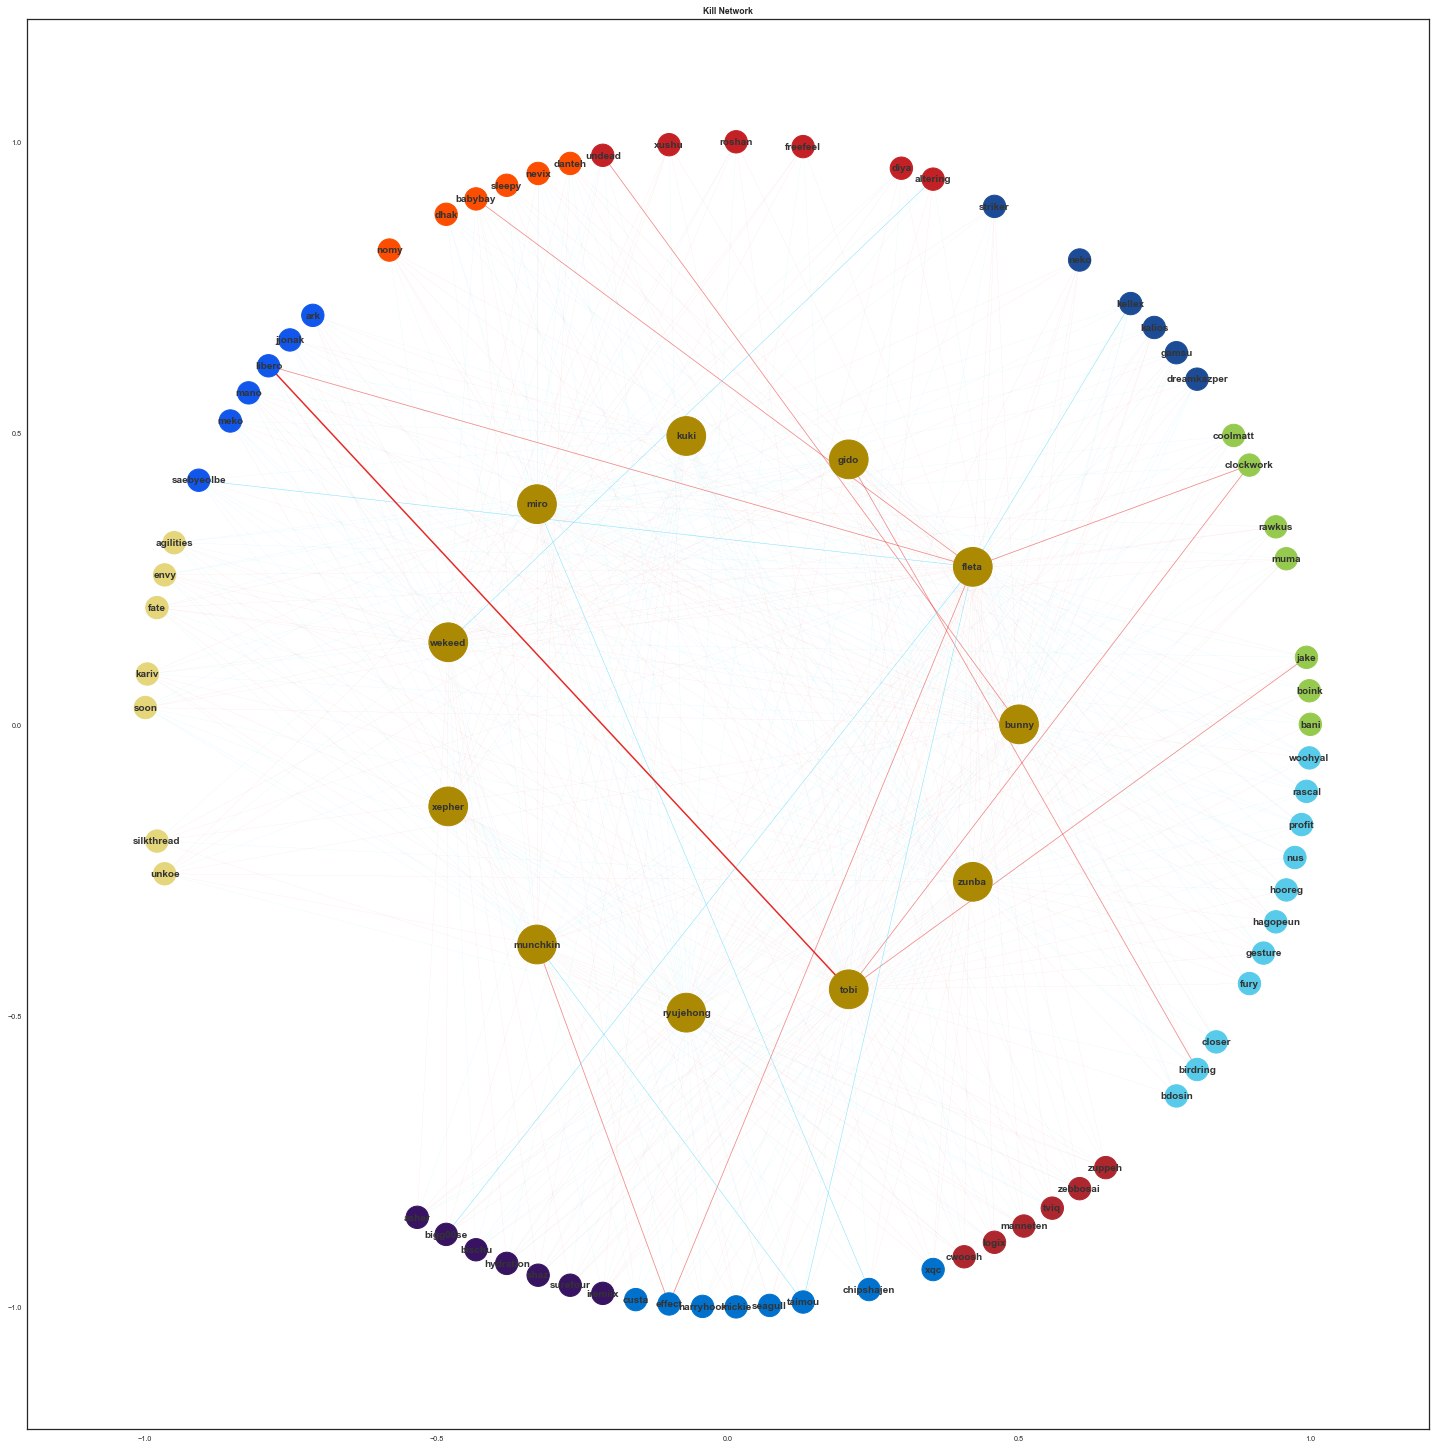

In [20]:
kill_network('Seoul Dynasty')

### Player Segmentation Per Character

Create player segmentation per character based on fight win percentage and kill death ratio. 

Segments characters based on the mean fw_percentage and kill death ratio into four different segments.

In [21]:
def segmentChar(character, x_val='fw_perc', y_val='kdr', size_val = 'ult_eff'):
    """
    Heper function to create the segmentation.
    
    params:
        character: str, name of hero of interest
        x_val: str, segmentation feature on x-axis. Defaults to fight win percentage.
        y_val: str, segmentation feature on y-axis. Defaults to kill-death ratio.
        size_val: str, attribute to determine node size. Defaults to ultimate usage efficiency.
    """
    df_char_perf = df_detStats[(df_detStats.character == character)&(df_detStats.matchID != '2454')&(df_detStats.matchID != '2817')]

    df_pivot = pd.pivot_table(data = df_char_perf, index = 'name', 
                              values = ['kills', 'deaths','time_played', 'fw_perc', 'ult_eff', 'ultchargetime'],
                              aggfunc = {'kills':np.sum, 'deaths':np.sum,'time_played':np.sum, 'fw_perc':np.mean, 'ult_eff':np.mean, 'ultchargetime':np.mean})
    
    df_pivot['kdr'] = df_pivot['kills']/df_pivot['deaths']
    df_pivot['deaths/min'] = df_pivot['deaths']/df_pivot['time_played']
    df_pivot = df_pivot[df_pivot.time_played > 10]
    
    min_val = np.min(df_pivot[size_val])
    max_val = np.max(df_pivot[size_val])

    df_pivot[size_val] = df_pivot[size_val].apply(lambda x: ((x - min_val)/(max_val - min_val))+0.001).fillna(1)
    
    plt.figure(figsize=(20,10))
    
    
    x_meas = [np.mean(df_pivot[x_val]), np.max(df_pivot[x_val]), np.min(df_pivot[x_val])]
    y_meas = [np.mean(df_pivot[y_val]), np.max(df_pivot[y_val]), np.min(df_pivot[y_val])]
    
    col = [team_color_dict[player_team_dict[x.lower()]][0] for x in list(df_pivot.index)]
    ecol = [team_color_dict[player_team_dict[x.lower()]][1] for x in list(df_pivot.index)]

    plt.plot([x_meas[2]-0.05, x_meas[1]+0.05], [y_meas[0], y_meas[0]])
    plt.plot([x_meas[0], x_meas[0]], [y_meas[2]-0.05, y_meas[1]+0.05])
    
    plt.scatter(df_pivot[x_val], df_pivot[y_val], s=df_pivot[size_val]*1000, c = col, edgecolors = ecol, linewidths = 1)

    for i in range(len(df_pivot.iloc[:,0])):
        plt.text(df_pivot[x_val][i], df_pivot[y_val][i], list(df_pivot.index)[i])

    plt.ylim((y_meas[2]-0.05, y_meas[1]+0.05))
    plt.xlim((x_meas[2]-0.05, x_meas[1]+0.05))
    plt.tight_layout()
    plt.xlabel(x_val)
    plt.ylabel(y_val)
    plt.title(character)
    plt.savefig('Animations/Player_Segmentation/Graphs/' + character + '.pdf')
    plt.show()
    
    df_pickrate = df_events.copy()
    df_pickrate['map']=[x + '|' + str(y) + '|' + str(z) for x, y, z in zip(df_pickrate['matchID'],df_pickrate['gameNum'],df_pickrate['roundNum'])]
    pickrate = len(df_pickrate[df_pickrate.SWITCH_to == character.lower().replace('.',"").replace(': ', "")].map.unique())/len(df_pickrate.map.unique())
    
    total_play_time = np.sum(df_detStats[df_detStats.character == character].time_played)
    total_play_time = str(int(total_play_time/60))+':'+ str(int(total_play_time % 60)) + ':' + str(((total_play_time % 60) - int(total_play_time % 60))*60)
    

    return(pickrate, total_play_time)
    

In [22]:
def get_playtime(character, player):
    """
    Helper function to get % of time a player has spent on a specific hero.
    
    params:
        character: str, hero of interest
        player: str, OWL player of interest
    """
    total_pt = np.sum(df_detStats[df_detStats.name == player]['time_played'])
    total_pt_char = np.sum(df_detStats[(df_detStats.name == player)&(df_detStats.character == character)]['time_played'])

    return(total_pt_char/total_pt)

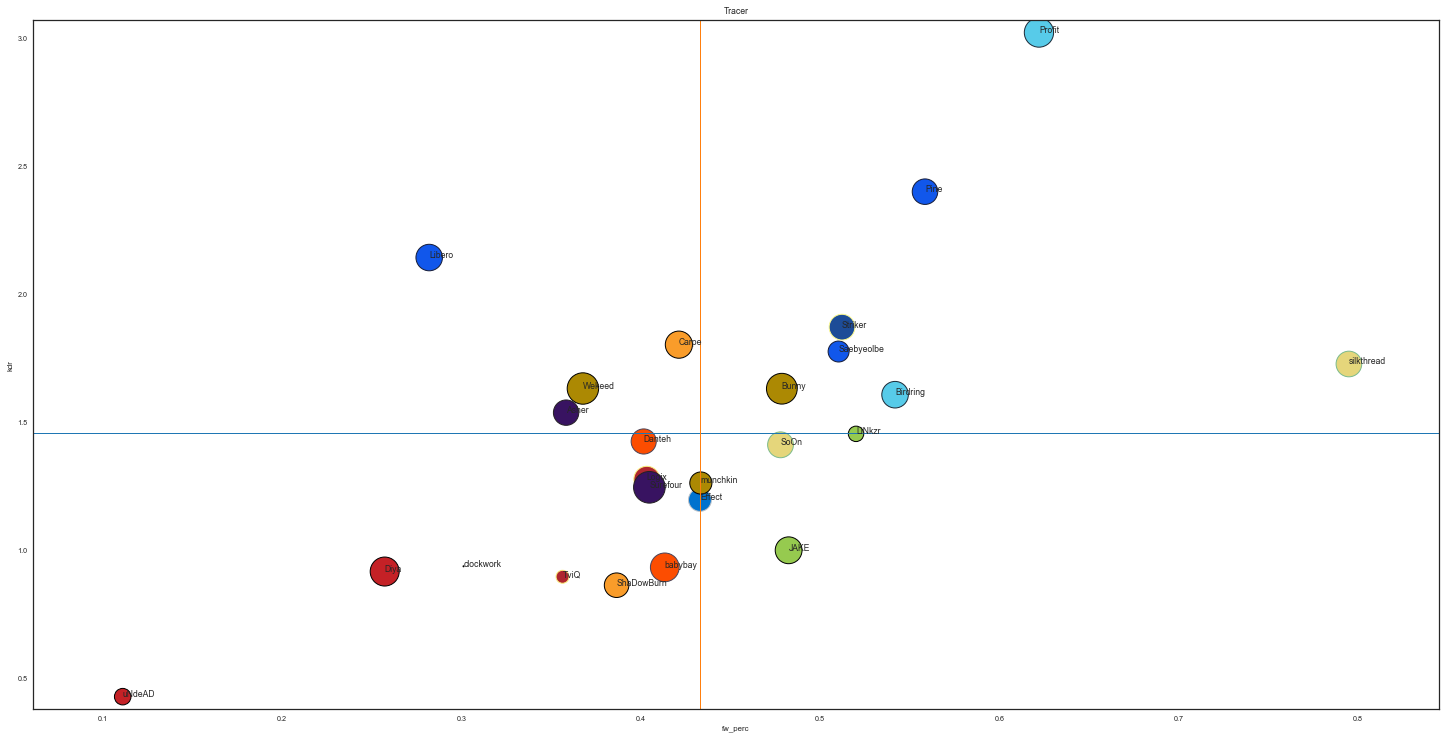

(0.9701726844583988, '73:59:20.999999999967258')

In [23]:
segmentChar('Tracer')

In [24]:
get_playtime('Tracer', 'Profit')

0.32377683558785914

### Character Play Time Per Team

Identify how much a certain team has played a certain character.

In [28]:
sorted_chars = list(pd.pivot_table(df_detStats, index = 'character', values = 'time_played', aggfunc=np.sum).sort_values().index)

df_mapPicks = df_detStats.copy()
df_mapPicks['team'] = [player_team_dict[x.lower()] for x in df_mapPicks.name]

df_time_played = pd.pivot_table(df_mapPicks, index = 'character', values = 'time_played', aggfunc=np.sum)

for t in df_mapPicks.team.unique():
    x = pd.pivot_table(df_mapPicks[df_mapPicks.team == t], index = 'character', values = 'time_played', aggfunc=np.sum)
    x = pd.DataFrame(x).rename(index = str, columns = {'time_played':t})
    df_time_played = pd.DataFrame(df_time_played).join(x)

#Perform max normalization to use for graphing
df_time_played = df_time_played.fillna(0).apply(lambda x: x/x.max(), axis=0)

df_time_played.head()

,time_played,Los Angeles Valiant,San Francisco Shock,Los Angeles Gladiators,Shanghai Dragons,Dallas Fuel,Seoul Dynasty,Florida Mayhem,London Spitfire,Boston Uprising,New York Excelsior,Houston Outlaws,Philadelphia Fusion
character,,,,,,,,,,,,,
Ana,0.034780,0.004347,0.017951,0.035606,0.058512,0.000000,0.066386,0.061440,0.038648,0.040575,0.039762,0.026856,0.029811
Bastion,0.022253,0.064048,0.023020,0.018145,0.008477,0.052896,0.000356,0.024279,0.000029,0.030016,0.015593,0.030961,0.000000
D.Va,0.923879,0.904112,0.912862,1.000000,0.923560,0.702442,1.000000,0.859437,0.924273,1.000000,0.850922,0.994328,0.975303
Doomfist,0.011733,0.003521,0.002328,0.045723,0.011508,0.046975,0.007330,0.008392,0.002852,0.001139,0.001281,0.003322,0.011778
Genji,0.283189,0.390534,0.247067,0.386269,0.055878,0.111592,0.268629,0.139872,0.319196,0.460425,0.265217,0.098148,0.585971


In [29]:
def graph_pickrate(team):
    """
    Helper function to graph how much a certain team has played each character.
    
    params:
        team: str, team of interest
    """
    
    plt.figure(figsize = (10,20))
    df_time_played[team].transpose()[sorted_chars].transpose().plot.barh(stacked=True)
    plt.xlim((0,1))
    #plt.savefig('Animations/PickRate_team/' + team + '.pdf',  transparent = True)
    plt.show()

### Map Performance

Get performance of a team on a certain map type in terms of map wins and fight wins.

In [30]:
#Dict to convert map name to map type
map_dict = {'Dorado': 'Escort', 
           'Junk':'Escort',
           'Eichen':'Hybrid',
           'Numbani':'Hybrid',
           'Anubis':'Assault',
           'Lunar':'Assault', 
           'Ilios':'Control',
           'Oasis':'Control',
           'Lijiang':'Control'}

In [31]:
def team_perf(team):
    """
    Helper function to return stats of a specific team on a each map type.
    
    params:
        team: str, team of interest
    """
    df_MP = df_matchStats[(df_matchStats.Team1 == team) | (df_matchStats.Team2 == team)]
    df_MP = df_MP[(df_MP.index != '2454')&(df_MP.index != '2817')]

    total_wins = 0
    total_maps = 0
    fights_won = 0
    total_fights = 0
    map_points = [0, 0, 0]

    wins = {'Escort':0, 'Hybrid':0, 'Assault':0, 'Control':0}
    mapcount = {'Escort':0, 'Hybrid':0, 'Assault':0, 'Control':0}

    for m in range(df_MP.shape[0]):

        matchdata = df_MP.iloc[m,:]

        if matchdata[1] == team:
            t = 0
            e = 1
        else:
            t = 1
            e = 0

        map_points[0] += matchdata[3:5][t]
        map_points[1] += matchdata[3:5][e]

        if matchdata[3:5][t]>matchdata[3:5][e]:
            total_wins += 1


        fights_won += matchdata[5:7][t]
        total_fights += sum(matchdata[5:7])

        for i in [9, 14, 19, 24, 29]:

            if matchdata[i] != 'NA':
                total_maps += 1

                mtype = map_dict[matchdata[i]]

                mapcount[mtype] = mapcount[mtype] + 1

                if matchdata[i+1:i+3][t] > matchdata[i+1:i+3][e]:
                    wins[mtype] = wins[mtype] + 1
                elif matchdata[i+1:i+3][t] == matchdata[i+1:i+3][e]:
                    map_points[2]  = map_points[2] + 1

    return {'WL': [total_wins, 10-total_wins],
           'nMaps':total_maps,
           'fights_won': fights_won,
           'nFights': total_fights,
           'MP': map_points,
           'win_type':wins,
           'map_diff' : map_points[0]- map_points[1],
           'nMaps_type':mapcount}

In [32]:
#Get total league averages.

ave_fw = 0
ave_ass = 0
ave_cont = 0
ave_esc = 0
ave_hyb = 0
ave_map = 0

for t in list(team_color_dict.keys()):
    
    perf = team_perf(t)
    
    fw_perc = perf['fights_won']/perf['nFights']
    asst_win = perf['win_type']['Assault']/perf['nMaps_type']['Assault']
    cont_win = perf['win_type']['Control']/perf['nMaps_type']['Control']
    esc_win = perf['win_type']['Escort']/perf['nMaps_type']['Escort']
    hyb_win = perf['win_type']['Hybrid']/perf['nMaps_type']['Hybrid']
    map_win = perf['MP'][0]/perf['nMaps']
    
    ave_fw += fw_perc
    ave_ass += asst_win
    ave_cont += cont_win
    ave_esc += esc_win
    ave_hyb += hyb_win
    ave_map += map_win
    
ave_fw /= 12
ave_ass /= 12
ave_cont /= 12
ave_esc /= 12
ave_hyb /= 12  
ave_map /=12

In [33]:
def get_comp_time(team, match, rnd, mat):
    """
    Helper function to get the all the compositions used by a team on a specific round of a map, as well as how much time spent on each comp.
    
    params:
        team: str, team of interest
        match: str, matchID of interest (based on Winstons lab URL)
        rnd: str/int, round number of interest
        mat: str/int, map number of interest
    """
    match = str(match)
    rnd = str(rnd)
    mat = str(mat)
    
    mEvent = df_events[(df_events.roundNum == rnd)&(df_events.gameNum == mat)&(df_events.ActingTeam == team) & (df_events.matchID == match) & (df_events.Action == 'SWITCH')]
    play_comp = {}
    complist = {}
    
    time_end = df_events[(df_events.roundNum == rnd)&(df_events.gameNum == mat)&(df_events.matchID==match)&(df_events.Action=='END')]['time']
    time_end = int(time_end)           
            
    for s in range(mEvent.shape[0]):
        
        if s < 6:
            play_comp[mEvent.ActingPlayer[s]] = mEvent.SWITCH_to[s]

        if s == 5 and mEvent.shape[0] > 6:
            
            complist[" | ".join(e for e in np.sort(list(play_comp.values())))] = int(mEvent.time[6])

        elif s == 5 and mEvent.shape[0] == 6:

            complist[" | ".join(e for e in np.sort(list(play_comp.values())))] = time_end
            
        elif s < mEvent.shape[0]-1 and s > 5:

            play_comp[mEvent.ActingPlayer[s]] = mEvent.SWITCH_to[s]
            complist[" | ".join(e for e in np.sort(list(play_comp.values())))] = mEvent.time[s+1] - mEvent.time[s]

        elif s == mEvent.shape[0]-1 and s > 5:

            play_comp[mEvent.ActingPlayer[s]] = mEvent.SWITCH_to[s]
            complist[" | ".join(e for e in np.sort(list(play_comp.values())))] = time_end - mEvent.time[s]
            
    return complist 

In [34]:
def get_comp_total(team):
    
    """
    Helper function to get all the comps used by a team on all maps.
    Uses the get_comp_time function for all matches.
    Separates time per map type.
    
    params:
        team: str, team of interest
    """
    uniq_games = df_events[df_events.ActingTeam == team][['matchID', 'gameNum','roundNum']].drop_duplicates()
    maploc = [9, 14, 19, 24, 29]
    uniq_games['map_type'] = [map_dict[df_matchStats[df_matchStats.index == m].values[0,maploc[int(g)-1]]] for m,g in zip(uniq_games.matchID, uniq_games.gameNum)]

    comp_type = {}
    for r in range(uniq_games.shape[0]):

        matchID = uniq_games.iloc[r,:][0]
        gameNum = uniq_games.iloc[r,:][1]
        roundNum = uniq_games.iloc[r,:][2]
        map_type = uniq_games.iloc[r,:][3]

        if r == 0 or map_type not in list(comp_type.keys()):
            comp_type[map_type] = get_comp_time(team, matchID, roundNum, gameNum)

        else:
            current_comp = comp_type[map_type]
            new_comp = get_comp_time(team, matchID, roundNum, gameNum)

            for c in list(new_comp.keys()):
                if c in list(current_comp.keys()):
                    current_comp[c] += new_comp[c]
                else:
                    current_comp[c] = new_comp[c]

            comp_type[map_type] = current_comp

    comp_type = pd.DataFrame(comp_type)
    comp_type['total'] = comp_type.sum(axis = 1)
    comp_type = comp_type.sort_values(by='total', ascending = False).fillna(0)
    
    return comp_type

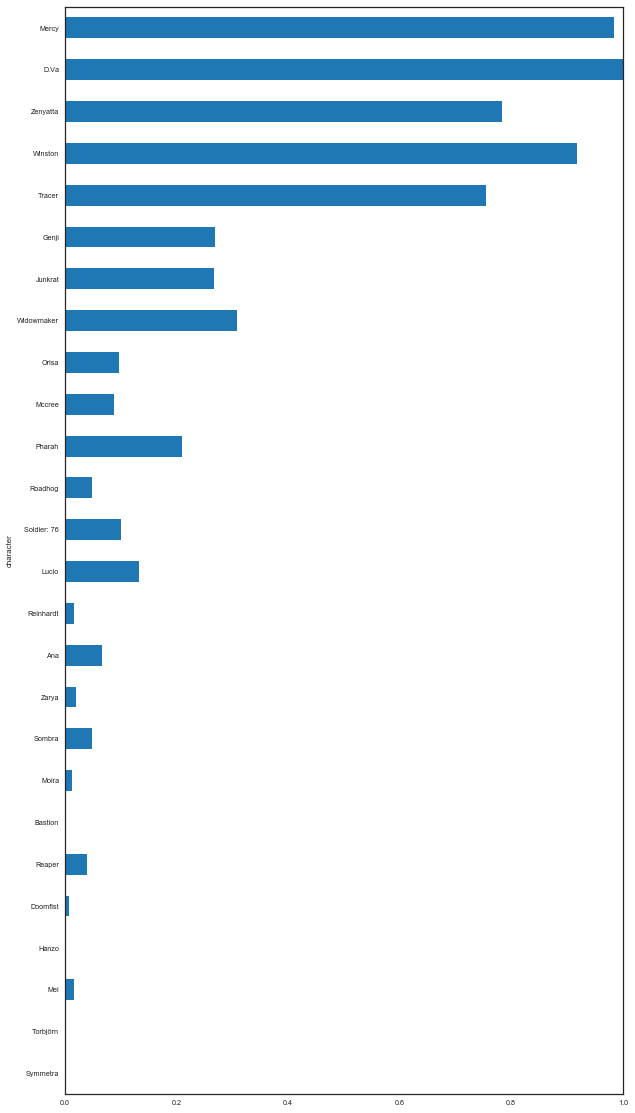

{'fights_won': 365, 'WL': [7, 3], 'map_diff': 9, 'MP': [25, 16, 2], 'nFights': 671, 'nMaps': 43, 'win_type': {'Control': 8, 'Escort': 5, 'Hybrid': 5, 'Assault': 7}, 'nMaps_type': {'Control': 13, 'Escort': 10, 'Hybrid': 10, 'Assault': 10}}


,total,Assault,Hybrid,Control,Escort
dva | genji | mercy | tracer | winston | zenyatta,5816.0,2650.0,955.0,269.0,1942.0
dva | mercy | tracer | widowmaker | winston | zenyatta,4151.0,348.0,1112.0,1359.0,1332.0
dva | mercy | pharah | tracer | winston | zenyatta,3198.0,0.0,1831.0,1367.0,0.0
dva | lucio | mercy | pharah | tracer | winston,2706.0,0.0,0.0,2706.0,0.0
dva | junkrat | mercy | tracer | winston | zenyatta,2163.0,1345.0,18.0,310.0,490.0


In [36]:
team_of_interest = 'Seoul Dynasty'

graph_pickrate(team_of_interest)
print(team_perf(team_of_interest))
get_comp_total(team_of_interest)[['total','Assault', 'Hybrid','Control','Escort']].head()

### Fight Data

Parse play-by-play data to create a dataset of fights, with each row being one fight with all of its attributes/features as defined below.

In [37]:
def parse_fights(match, gameNum, roundNum):
    
    """
    Helper function to convert play by play data for a single round to fight data.
    
    params:
        match: str, matchID based on Winstons Lab URL
        gameNum: str, game number of interest
        roundNum: str, round number of interest
    """
    characterList = df_detStats.character.unique()
    
    fight = df_events[(df_events.matchID == match) & (df_events.gameNum == gameNum) & (df_events.roundNum == roundNum)]
    time = 0
    team1 = fight.Team1[0]
    team2 = fight.Team2[1]
    team1_comp = {}
    team2_comp = {}
    teams = [team1, team2]

    fight_now = 0
    ult_status_1 = {}
    ult_status_2 = {}

    fight_start = 0
    fight_num = 0
    record_fight = {}
    kill_time = 0
    for s in range(fight.shape[0]):

        #INITIALIZE TEAM PICKS
        if s > 0 and s < 7:

            team1_comp[fight.ActingPlayer[s]] = fight.SWITCH_to[s]
            ult_status_1[fight.ActingPlayer[s]] = 0

        elif s > 6 and s < 13:

            team2_comp[fight.ActingPlayer[s]] = fight.SWITCH_to[s]
            ult_status_2[fight.ActingPlayer[s]] = 0


        else:

            #ACTIONS WHEN FIGHT IS NOT ON-GOING

            fight_end = fight.time[s] - kill_time > 14 and fight_now == 1
            match_end = fight.Action[s] == 'END' and fight_now == 1
            if fight_now == 0 or fight_end == True or match_end == True:

                #RECORD STATS
                if fight_end == True or match_end == True:
                    fight_now = 0 
                    record_fight = {'fight_score':fight_score,
                                    'fight_start':fight_start,
                                    'fight_end': fight.time[s],
                                   'first_kill':first_kill,
                                   'kill_order':kill_order,
                                   'team1_comp': chars1,
                                   'team2_comp': chars2,
                                   'fight_time': kill_time - fight_start,
                                   'ult_use_1': ult_use_team1,
                                   'ult_use_2': ult_use_team2,
                                   'switch_inFight': switch_infight,
                                   'revive_inFight': revive_infight,
                
                                  }

                    if fight_num == 1:
                        df_fights = pd.DataFrame({fight_num:record_fight}).transpose()
                    else:
                        temp = pd.DataFrame({fight_num:record_fight}).transpose()
                        df_fights = pd.concat([df_fights, temp])



                if fight.Action[s] == 'SWITCH':

                    if fight.ActingTeam[s] == team1:

                        team1_comp[fight.ActingPlayer[s]] = fight.SWITCH_to[s]

                    else:

                        team2_comp[fight.ActingPlayer[s]] = fight.SWITCH_to[s]

                elif fight.Action[s] == 'KILL':
                    #FIGHT STARTS
                    fight_num+=1
                    fight_now = 1

                    
                    ult_use_team1 = {el.lower().replace('.',"").replace(': ',"").replace('ö','o'):0 for el in characterList}
                    ult_use_team2 = {el.lower().replace('.',"").replace(': ',"").replace('ö','o'):0 for el in characterList}

                    revive_infight = {'team1':0, 'team2':0}
                    switch_infight = {'team1':0, 'team2':0}
                    
                    chars1 = list(team1_comp.values())
                    chars2 = list(team2_comp.values())
     

                    first_kill = {'Team_FK': teams.index(fight.ActingTeam[s]), 
                                 'from_FK': fight.ActingPlayer[s], 
                                 'from_FK' : fight.KILL_er_char[s],
                                 'to_FK': fight.KILL_ed_name[s],
                                 'to_char_FK' : fight.KILL_ed_char[s],
                                 'to_role_FK' : player_role_dict[fight.KILL_ed_name[s].lower()]
                                 }

                    if fight.ActingTeam[s] == team1:
                        fight_score = {'team1': 1,'team2': 0}
                        kill_order = {'team1': [], 'team2':[fight.KILL_ed_char[s]]}
                    else:
                        fight_score = {'team1': 0,'team2': 1}            
                        kill_order = {'team2': [], 'team1':[fight.KILL_ed_char[s]]}


                    ult_used = fight.iloc[:s,:]
                    ult_used = ult_used[ult_used.Action == 'ULT_USE']

                    for u in range(ult_used.shape[0]):

                        if fight.time[s] - ult_used.time[u] <= 12:

                            if ult_used.ActingTeam[u] == team1:
                                ult_use_team1[ult_used.ULT_USE_char[u]] = 1
                            else:
                                ult_use_team2[ult_used.ULT_USE_char[u]] = 1


                    fight_start = fight.time[s]
                    kill_time = fight.time[s]


                elif fight.Action[s] == 'ULT_GAIN':

                    if fight.ActingTeam[s] == team1:
                        ult_status_1[fight.ActingPlayer[s]] = 1
                    else:
                        ult_status_1[fight.ActingPlayer[s]] = 1


            #ACTIONS WHEN FIGHT IS ONGOING
            elif fight_now == 1:

                if fight.Action[s] == 'KILL':

                    if fight.ActingTeam[s] == team1:
                        fight_score['team1'] += 1
                        kill_order['team2'].append(fight.KILL_ed_char[s])
                    else:
                        fight_score['team2'] += 1
                        kill_order['team1'].append(fight.KILL_ed_char[s])

                    kill_time = fight.time[s]

                elif fight.Action[s] == 'SWITCH':

                    if fight.ActingTeam[s] == team1:

                        team1_comp[fight.ActingPlayer[s]] = fight.SWITCH_to[s]
                        switch_infight['team1'] += 1
                        chars1.append(fight.SWITCH_to[s])

                    else:

                        team2_comp[fight.ActingPlayer[s]] = fight.SWITCH_to[s]               
                        switch_infight['team2'] += 1
                        chars2.append(fight.SWITCH_to[s])

                elif fight.Action[s] == 'SUICIDE':
                    if fight.ActingTeam[s] == team1:
                        kill_order['team1'].append(fight.SUI_char[s])
                        fight_score['team2'] += 1

                    else:
                        kill_order['team2'].append(fight.SUI_char[s])
                        fight_score['team1'] += 1

                elif fight.Action[s] == 'ULT_USE':

                    if fight.ActingTeam[s] == team1:
                        ult_use_team1[fight.ULT_USE_char[s]] = 1
                    else:
                        ult_use_team2[fight.ULT_USE_char[s]] = 1

                elif fight.Action[s] == 'REVIVE':
                    if fight.ActingTeam[s] == team1:
                        revive_infight['team1'] += 1
                    else:
                        revive_infight['team2'] += 1                


    return(df_fights)


In [38]:
def conv_to_df(df_fights, matchID, gameNum, roundNum):
    """
    Helper function to convert initial parsing to a more usable dataframe.
    
    params:
        df_fights: DataFrame, result of parse_fights() function.
        matchID: matchID of interest, should be the same as parse_fights() input.
        gameNum: gameNum of interest, should be the same as parse_fights() input.
        roundNum: roundNum of interest, should be the same as parse_fights() input.
    """
    for c in range(df_fights.shape[0]):

        if df_fights.fight_score.iloc[c]['team1'] > df_fights.fight_score.iloc[c]['team2']:
            result = 1
        elif df_fights.fight_score.iloc[c]['team1'] == df_fights.fight_score.iloc[c]['team2']:
            result = 2
        else:
            result = 0

        characterList = df_detStats.character.unique()

        team1_comp = df_fights.team1_comp.iloc[c]
        team2_comp = df_fights.team2_comp.iloc[c]
        

        df_comp_1 = pd.DataFrame({1:{el.lower().replace('.', "").replace(': ', "").replace('ö','o'):0 for el in characterList}})
        df_comp_2 = pd.DataFrame({1:{el.lower().replace('.', "").replace(': ', "").replace('ö','o'):0 for el in characterList}})
        
        df_comp_1['team'] = [1 if char.lower().replace('.', "").replace(': ', "").replace('ö','o') in team1_comp else 0 for char in list(df_comp_1.index)]
        df_comp_1 = df_comp_1.drop(1, axis = 1).transpose()
        
        df_comp_2['team'] = [1 if char.lower().replace('.', "").replace(': ', "").replace('ö','o') in team2_comp else 0 for char in list(df_comp_2.index)]
        df_comp_2 = df_comp_2.drop(1, axis = 1).transpose()
        
        df_ult1 = pd.DataFrame({1:{el.lower().replace('.',"").replace(': ',"").replace('ö','o'):0 for el in characterList}})
        df_ult2 = pd.DataFrame({1:{el.lower().replace('.',"").replace(': ',"").replace('ö','o'):0 for el in characterList}})

        df_ult1 = df_ult1.join(pd.DataFrame({0:df_fights.ult_use_1.iloc[c]})).fillna(0).drop(1, axis = 1).transpose()
        df_ult2 = df_ult2.join(pd.DataFrame({0:df_fights.ult_use_2.iloc[c]})).fillna(0).drop(1, axis = 1).transpose()

        team1_killed = df_fights.kill_order.iloc[c]['team1'][:3]
        team2_killed = df_fights.kill_order.iloc[c]['team2'][:3]
        
        df_kill1 = pd.DataFrame({1:{el.lower().replace('.', "").replace(': ', "").replace('ö','o'):0 for el in characterList}})
        df_kill2 = pd.DataFrame({1:{el.lower().replace('.', "").replace(': ', "").replace('ö','o'):0 for el in characterList}})
   
        #print(team1_killed)
        df_kill1['team'] = [1 if char.lower().replace('.', "").replace(': ', "").replace('ö','o') in team1_killed else 0 for char in list(df_kill1.index)]
        df_kill1 = df_kill1.drop(1, axis = 1).transpose()
   
        df_kill2['team'] = [1 if char.lower().replace('.', "").replace(': ', "").replace('ö','o') in team2_killed else 0 for char in list(df_kill2.index)]
        df_kill2 = df_kill2.drop(1, axis = 1).transpose()
                
        
        
        df_record = {'matchID':matchID,
                    'gameNum': gameNum,
                    'roundNum': roundNum,
                    'Win': result, 
                    'got_first_kill': abs(df_fights.first_kill.iloc[c]['Team_FK']-1),
                    'fk_char': df_fights.first_kill.iloc[c]['to_char_FK'],
                    'fk_role': df_fights.first_kill.iloc[c]['to_role_FK'],
                    'team_revive': int(df_fights.revive_inFight.iloc[c]['team1']>0),
                    'en_revive': int(df_fights.revive_inFight.iloc[c]['team2']>0),
                    'team_switch': int(df_fights.switch_inFight.iloc[c]['team1']>0),
                    'en_switch': int(df_fights.switch_inFight.iloc[c]['team2']>0),
                    }


        df_record = pd.DataFrame({0:df_record}).transpose().reset_index().drop('index', axis = 1)
        df_record = df_record[['Win', 'matchID', 'gameNum', 'roundNum', 'got_first_kill', 'fk_char', 'fk_role',
                              'team_revive', 'en_revive', 'team_switch', 'en_switch']]

        df_ult = df_ult1.join(df_ult2, lsuffix = '_ult_team1', rsuffix = '_ult_team2').reset_index().drop('index', axis = 1)
        df_comp = df_comp_1.join(df_comp_2,lsuffix = '_team1', rsuffix = '_team2').reset_index().drop('index', axis = 1)
        df_kill = df_kill1.join(df_kill2, lsuffix = '_waskilled', rsuffix = '_killed').reset_index().drop('index', axis = 1)
        
        if c == 0:

            df_fightStats = df_record.join(df_comp, how = 'right')
            df_fightStats = df_fightStats.join(df_ult, how = 'right')
            df_fightStats = df_fightStats.join(df_kill, how = 'right')

        else:

            df_temp = df_record.join(df_comp, how = 'right')
            df_temp = df_temp.join(df_ult, how = 'right')   
            df_temp = df_temp.join(df_kill, how = 'right')
            
            df_fightStats = pd.concat([df_fightStats, df_temp])
            
    return df_fightStats

In [39]:
#Loop through all matches, games and rounds to get a dataframe containing all the fights with attributes of interest.

unique_matches = df_events[['matchID', 'gameNum','roundNum']].drop_duplicates()

for m in range(unique_matches.shape[0]):
    matchID = unique_matches.matchID.iloc[m]
    gameNum = unique_matches.gameNum.iloc[m]
    roundNum = unique_matches.roundNum.iloc[m]
    #print(matchID, gameNum, roundNum)
    if m == 0:
        df_fightStats = conv_to_df(parse_fights(matchID, gameNum, roundNum),matchID, gameNum, roundNum)
        
    else:
        df_fightStats = pd.concat([df_fightStats, conv_to_df(parse_fights(matchID, gameNum, roundNum),matchID, gameNum, roundNum)])
        
        
    

In [40]:
df_fightStats.head()

,Win,matchID,gameNum,roundNum,got_first_kill,fk_char,fk_role,team_revive,en_revive,team_switch,...,roadhog_killed,soldier76_killed,sombra_killed,symmetra_killed,torbjorn_killed,tracer_killed,widowmaker_killed,winston_killed,zarya_killed,zenyatta_killed
0,0,2443,1,1,0,pharah,Offense,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,2443,1,1,0,pharah,Offense,1,0,0,...,0,0,0,0,0,0,0,1,0,0
0,0,2443,1,1,0,pharah,Offense,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,2443,1,1,1,zenyatta,Offense,1,1,0,...,0,0,0,0,0,0,0,0,0,1
0,1,2443,1,1,1,tracer,Offense,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### CREATE DECISION TREE TO UNDERSTAND FIGHT WIN PROBABILITIES

Below we attempt to use a simple decision tree to find a simple model that is able to predict wins reliably well for visualization purposes.

In [41]:
df_experiment = df_fightStats.copy()
df_experiment = df_experiment.reset_index().drop('index', axis = 1)

#Convert non-numeric attributes to dummy variables
df_experiment = df_experiment.join(pd.get_dummies(df_experiment['fk_char']), rsuffix= '_fk')
df_experiment = df_experiment.join(pd.get_dummies(df_experiment['fk_role']))

#Drop irrelevant columns. Switching was dropped as this is not an indicator of win or loss but a result and usually happens at the end of a fight..
df_experiment = df_experiment.drop(['matchID', 'gameNum', 'roundNum','fk_char', 'fk_role', 'team_switch' ,'en_switch'], axis = 1)

#Remove ties
df_experiment = df_experiment[df_experiment.Win != 2]


for i in list(df_experiment.columns)[4:]:
    
    total = np.sum(df_experiment[i])
    
    #To decrease the size of our data set, we drop the columns that have less than 500 occurences.
    if total < 500:
        df_experiment = df_experiment.drop(i, axis = 1)


df_experiment.shape
df_experiment.head()

,Win,got_first_kill,team_revive,en_revive,dva_team1,genji_team1,junkrat_team1,mccree_team1,mercy_team1,orisa_team1,...,mercy_killed,tracer_killed,winston_killed,zenyatta_killed,tracer,winston,zenyatta,Offense,Support,Tank
0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
1,0,0,1,0,1,0,0,0,1,0,...,0,0,1,0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,1,1,1,1,0,0,0,1,0,...,0,0,0,1,0.0,0.0,1.0,1.0,0.0,0.0
4,1,1,0,0,1,0,0,0,1,0,...,1,1,0,0,1.0,0.0,0.0,1.0,0.0,0.0


In [42]:
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn.naive_bayes import GaussianNB

In [43]:

X_train, X_test, y_train, y_test = train_test_split(df_experiment.iloc[:, 1:], df_experiment.Win.astype('int'), test_size = 0.33)

#Use cross validation to find the best set of features to use. We limit the depth to only 5 as to ensure that the model we end up getting is not too complicated.
best_score = [0, 0, 0, 0]
for depth in range(1,5):
    for min_samples in [100, 300]:
        for max_features in range(10, 53, 2):
        
            RF_CV = DecisionTreeClassifier(max_depth = depth, min_samples_leaf= min_samples, max_features = max_features)
            score = np.mean(cross_val_score(RF_CV, X_train, y_train, cv = 10))
            
            #print(depth, min_samples, max_features, score)
            if score > best_score[0]:
                best_score[0] = score
                best_score[1] = depth
                best_score[2] = min_samples
                best_score[3] = max_features



In [44]:
best_score

[0.80647898069733726, 4, 300, 22]

In [45]:
RF_final = DecisionTreeClassifier(max_depth = best_score[1], min_samples_leaf= best_score[2],  max_features = best_score[3])
RF_final.fit(X_train, y_train)

accuracy_score(y_test, RF_final.predict(X_test))

0.78939034045922407

As you can see above, we use a depth a of 4 with only 22 of the 52 features we originally had as our best model.
It performs relatively well on both training and test set with around 79-80% accuracy. Benchmark is around 60%.

In [52]:
#Check ROC AUC Score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, RF_final.predict(X_test))

0.78918186360860287

In [46]:
#Download the resulting tree to visualize the model.
from graphviz import Source
from sklearn import tree

dotfile = open("2.dot", 'w')
tree.export_graphviz(RF_final, out_file=dotfile, feature_names=X_train.columns)
dotfile.close()


<img src="Animations/ResultingModel.png", height=500, width = 500>

### VISUALIZE CONDITIONAL PROBABILITIES USING PSEUDO MOSAIC PLOTS

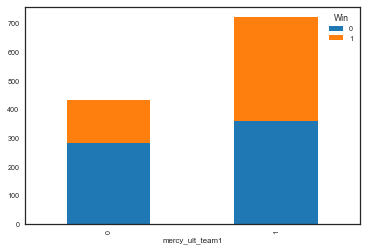

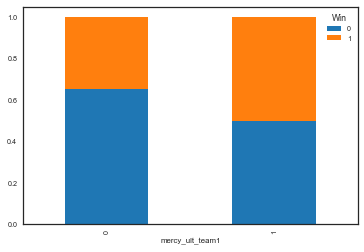

mercy_ult_team1,0,1
Win,,
0,0.650463,0.495146
1,0.349537,0.504854


In [53]:
#Use crosstab feature of pandas to compare win probabilities given different events.

exp = df_experiment[(df_experiment.mercy_ult_team2 == 1)]

factor = 'mercy_ult_team1'
plot_me = pd.crosstab(exp.Win, exp[factor])
plot_me.transpose().plot.bar(stacked=True)
plt.show()

plot_me = pd.crosstab(exp.Win, exp[factor], normalize = 'columns')
plot_me.transpose().plot.bar(stacked=True)
plt.show()

plot_me

In [54]:
#Get win probability given the total fight result
check = df_matchStats.copy()
check['MFW'] = [1 if team1 > team2 else 0 for team1, team2 in zip(check.Fights_1, check.Fights_2)]
check['W'] = [1 if team1 > team2 else 0 for team1, team2 in zip(check.Team1_Score, check.Team2_Score)]

pd.crosstab(check.W, check.MFW, normalize = 'columns')


MFW,0,1
W,,
0,0.852941,0.142857
1,0.147059,0.857143
